In [57]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [58]:
df = pd.read_csv('./train.csv')

In [59]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13 km/kg,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
3,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
4,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50


In [60]:
df.shape

(5847, 14)

In [61]:
print(df['Location'].unique())
print(df['Transmission'].unique())
print(df['Owner_Type'].unique())

['Pune' 'Chennai' 'Coimbatore' 'Jaipur' 'Mumbai' 'Kochi' 'Kolkata' 'Delhi'
 'Bangalore' 'Hyderabad' 'Ahmedabad']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


In [62]:
print(df['Seats'].unique())

[ 5.  7.  8.  4.  6.  2. nan 10.  9.]


In [63]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  38
New_Price            5032
Price                   0
dtype: int64

In [64]:
df.drop(['New_Price'],axis=1,inplace=True)

In [65]:
df['Mileage']=df['Mileage'].str.split().str.get(0).str.replace(',','')

In [66]:
df['Engine']=df['Engine'].str.split().str.get(0).str.replace(',','')

In [67]:
df['Power']=df['Power'].str.split().str.get(0).str.replace(',','')

In [68]:
df['Name']=df['Name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [69]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Hyundai Creta 1.6,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13,1199,88.7,5.0,4.50
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
3,4,Audi A4 New,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74
4,6,Nissan Micra Diesel,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461,63.1,5.0,3.50


In [70]:
print(df['Fuel_Type'].unique())

['Diesel' 'Petrol' 'Electric']


In [71]:
df.isnull().sum()

Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                38
Price                 0
dtype: int64

In [72]:
df.dropna(inplace=True)

In [73]:
df.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5807 entries, 0 to 5846
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5807 non-null   int64  
 1   Name               5807 non-null   object 
 2   Location           5807 non-null   object 
 3   Year               5807 non-null   int64  
 4   Kilometers_Driven  5807 non-null   int64  
 5   Fuel_Type          5807 non-null   object 
 6   Transmission       5807 non-null   object 
 7   Owner_Type         5807 non-null   object 
 8   Mileage            5807 non-null   object 
 9   Engine             5807 non-null   object 
 10  Power              5807 non-null   object 
 11  Seats              5807 non-null   float64
 12  Price              5807 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 635.1+ KB


In [75]:
df.describe(include='all')

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5807.000000,5807,5807,5807.000000,5.807000e+03,5807,5807,5807,5807,5807,5807,5807.000000,5807.000000
unique,NaN,655,11,NaN,NaN,2,2,4,419,139,360,NaN,NaN
top,NaN,Hyundai Grand i10,Mumbai,NaN,NaN,Diesel,Manual,First,18.9,1197,74,NaN,NaN
freq,NaN,152,757,NaN,NaN,3152,4105,4786,172,602,235,NaN,NaN
mean,3013.686585,NaN,NaN,2013.475805,5.834902e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.286551,9.673429
std,1737.960240,NaN,NaN,3.170718,9.265556e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.806790,11.292012
min,1.000000,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.440000
25%,1508.500000,NaN,NaN,2012.000000,3.328800e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,3.590000
50%,3017.000000,NaN,NaN,2014.000000,5.240000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.750000
75%,4518.500000,NaN,NaN,2016.000000,7.245750e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,10.250000


In [76]:
def extract_first_word(name):
    return name.split()[0]
df['company'] = df['Name'].apply(extract_first_word)

In [77]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,company
0,1,Hyundai Creta 1.6,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,Hyundai
1,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,13,1199,88.7,5.0,4.50,Honda
2,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti
3,4,Audi A4 New,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74,Audi
4,6,Nissan Micra Diesel,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461,63.1,5.0,3.50,Nissan


In [78]:
df.to_csv('Cleaned_Car_data.csv')

C:\Users\Sameer Marathe\AppData\Local\Temp\ipykernel_16024\2936989930.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


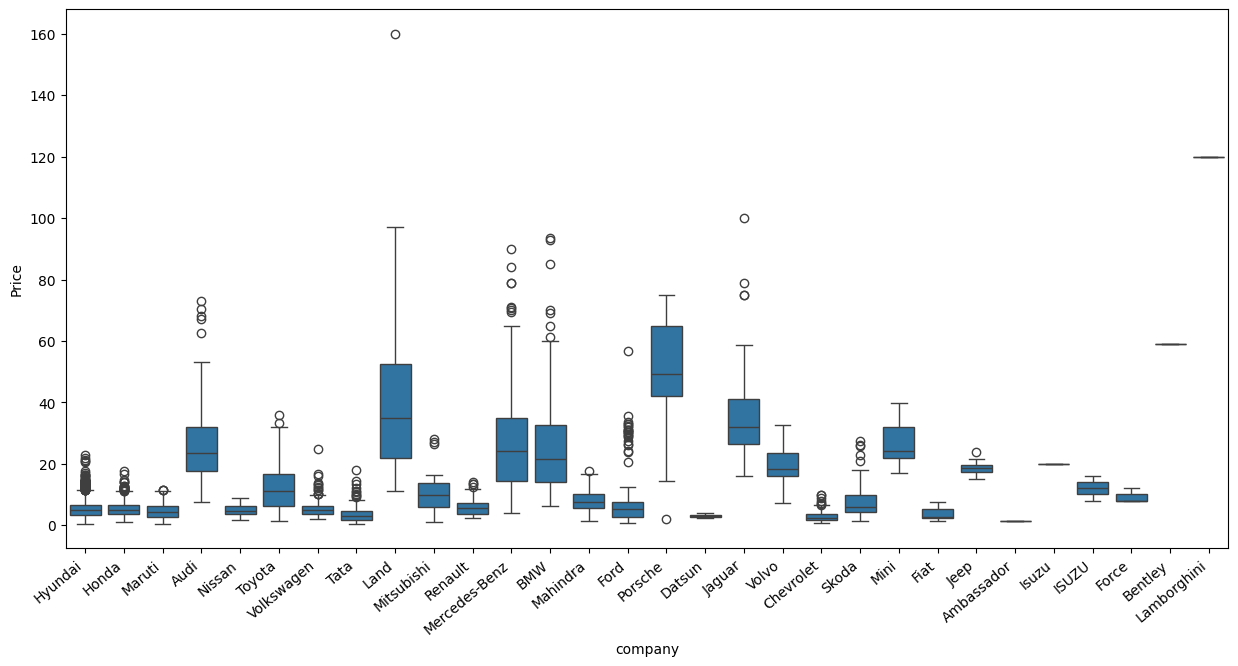

In [79]:
import seaborn as sns
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

c:\Users\Sameer Marathe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Sameer Marathe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Sameer Marathe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 30.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Sameer Marathe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 35.6% of the points cannot be placed; you may want to decrease the size of the markers o

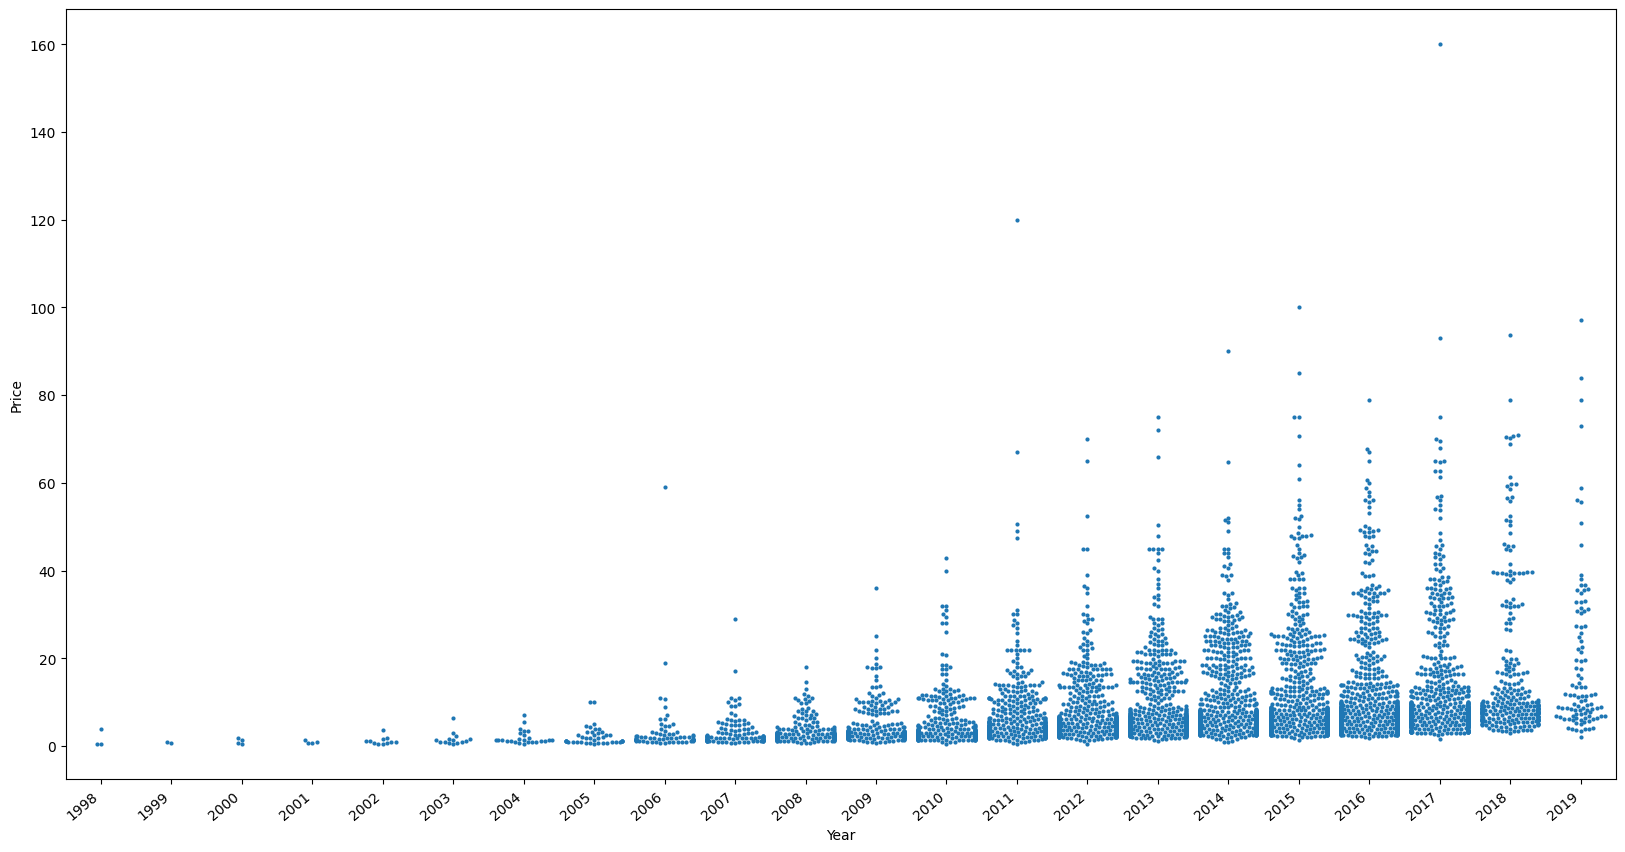

In [80]:
plt.subplots(figsize=(20, 10))
ax = sns.swarmplot(x='Year', y='Price', data=df, dodge=True, size=3)  # Adjust size and add dodge
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

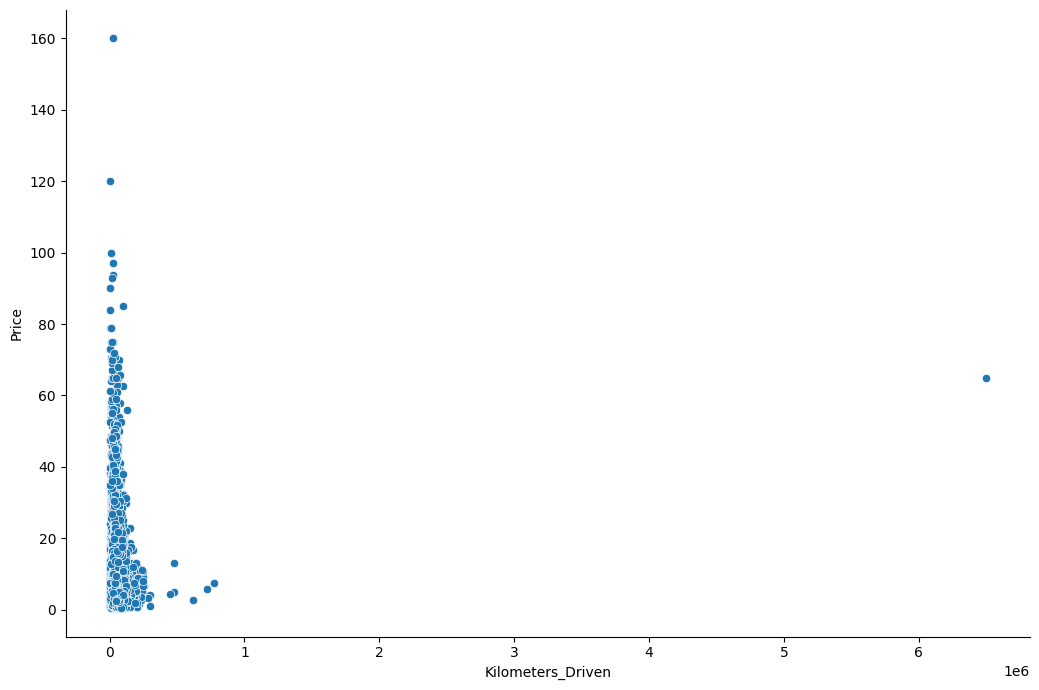

In [81]:
sns.relplot(x='Kilometers_Driven',y='Price',data=df,height=7,aspect=1.5)

<Axes: xlabel='Fuel_Type', ylabel='Price'>

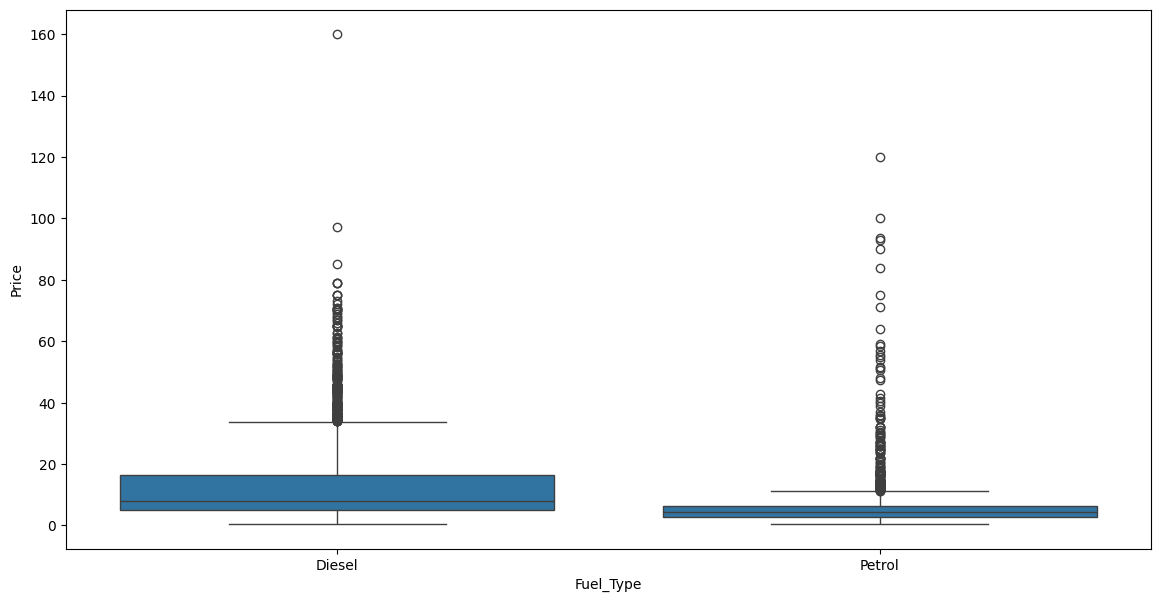

In [82]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='Fuel_Type',y='Price',data=df)

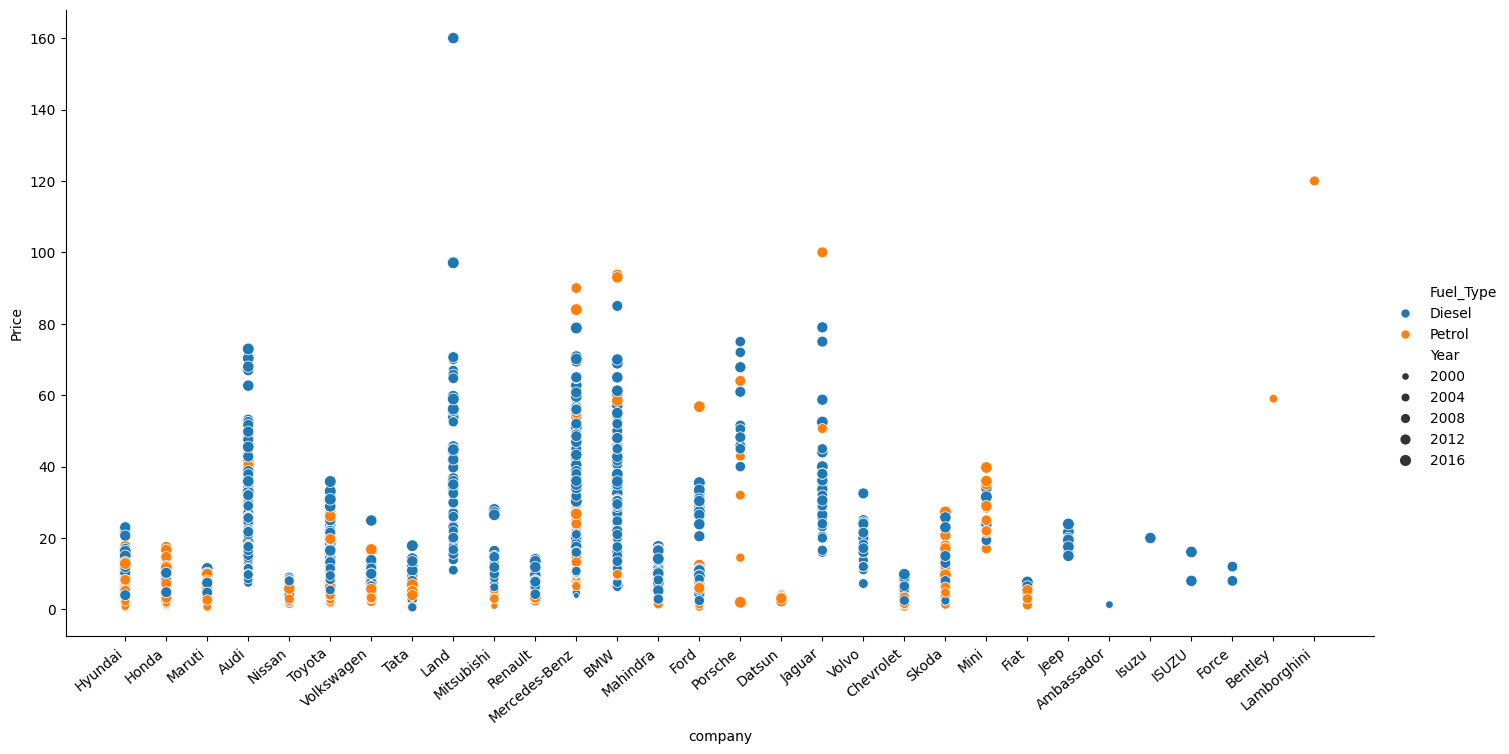

In [83]:
ax=sns.relplot(x='company',y='Price',data=df,hue='Fuel_Type',size='Year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

Extracting Training Data

In [84]:
X=df[['Name','company','Year','Kilometers_Driven','Fuel_Type']]
y=df['Price']

In [85]:
X

,Name,company,Year,Kilometers_Driven,Fuel_Type
0,Hyundai Creta 1.6,Hyundai,2015,41000,Diesel
1,Honda Jazz V,Honda,2011,46000,Petrol
2,Maruti Ertiga VDI,Maruti,2012,87000,Diesel
3,Audi A4 New,Audi,2013,40670,Diesel
4,Nissan Micra Diesel,Nissan,2013,86999,Diesel
...,...,...,...,...,...
5842,Maruti Swift VDI,Maruti,2014,27365,Diesel
5843,Hyundai Xcent 1.1,Hyundai,2015,100000,Diesel
5844,Mahindra Xylo D4,Mahindra,2012,55000,Diesel
5845,Maruti Wagon R,Maruti,2013,46000,Petrol


In [86]:
y

0       12.50
1        4.50
2        6.00
3       17.74
4        3.50
        ...  
5842     4.75
5843     4.00
5844     2.90
5845     2.65
5846     2.50
Name: Price, Length: 5807, dtype: float64

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

Creating an OneHotEncoder object to contain all the possible categories

In [89]:
ohe=OneHotEncoder()
ohe.fit(X[['Name','company','Fuel_Type']])

OneHotEncoder()

Creating a column transformer to transform categorical columns

In [90]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Name','company','Fuel_Type']),
                                    remainder='passthrough')

In [91]:
lr=LinearRegression()

In [92]:
pipe=make_pipeline(column_trans,lr)

In [93]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ambassador Classic Nova', 'Audi A3 35', 'Audi A4 1.8',
       'Audi A4 2.0', 'Audi A4 3.0', 'Audi A4 30', 'Audi A4 35',
       'Audi A4 New', 'Audi A6 2.0', 'Audi A6 2.7', 'Audi A6 2.8',
       'Audi A6 2011-2015', 'Audi A6 3.0', 'Audi A6 35',
       'Audi A7 2011-2015', 'Audi A8...
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'ISUZU', 'Isuzu',
       'Jaguar', 'Jeep', 'Lamborghini', 'Land', 'Mahindra', 'Maruti',
       'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Porsche',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'Petrol'], dtype=object)]),
                                                  ['Name', 'company',
                                                   'Fuel_Type'])])),
                ('linearregression', LinearRegression())])

In [94]:
y_pred=pipe.predict(X_test)

In [95]:
r2_score(y_test,y_pred)

0.47678450551351004

In [96]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [97]:
np.argmax(scores)

98

In [98]:
scores[np.argmax(scores)]

0.638662303084918

In [99]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Hyundai Creta 1.6','Hyundai',2015,100,'Diesel']).reshape(1,5)))

array([7.62447574])

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.638662303084918

In [101]:
import pickle
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [102]:
pipe.predict(pd.DataFrame(columns=['Name','company','Year','Kilometers_Driven','Fuel_Type'],data=np.array(['Hyundai Creta 1.6','Hyundai',2015,100,'Diesel']).reshape(1,5)))

array([7.64088141])

In [103]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Ambassador Classic Nova', 'Audi A3 35', 'Audi A4 1.8',
       'Audi A4 2.0', 'Audi A4 3.0', 'Audi A4 30', 'Audi A4 35',
       'Audi A4 New', 'Audi A6 2.0', 'Audi A6 2.7', 'Audi A6 2.8',
       'Audi A6 2011-2015', 'Audi A6 3.0', 'Audi A6 35',
       'Audi A7 2011-2015', 'Audi A8 L', 'Audi Q3 2.0',
       'Audi Q3 2012-2015', 'Audi Q3 30', 'Audi Q3 35', 'Audi Q5 2.0',
       'Audi Q5 2008-2012', 'Audi Q5 3.0', 'Audi Q5 30', 'Audi Q7 3.0',
       'Audi Q7 35', 'Audi Q7 4.2', 'Audi Q7 45', 'Audi RS5 Coupe',
       'Audi TT 2.0', 'Audi TT 40', 'BMW 1 Series', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 6 Series', 'BMW 7 Series', 'BMW X1 M',
       'BMW X1 sDrive', 'BMW X1 sDrive20d', 'BMW X1 xDrive',
       'BMW X3 xDrive', 'BMW X3 xDrive20d', 'BMW X3 xDrive30d',
       'BMW X5 2014-2019', 'BMW X5 3.0d', 'BMW X5 X5', 'BMW X5 xDrive',
       'BMW X6 xDrive', 'BMW X6 xDrive30d', 'BMW Z4 2009-2013',
       'Bentley Continental Flying', 'Chevrolet Aveo 1.4',
       'Chevrolet Aveo 1.6

In [104]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,5807.000000,5807.000000,5.807000e+03,5807.000000,5807.000000
mean,3013.686585,2013.475805,5.834902e+04,5.286551,9.673429
std,1737.960240,3.170718,9.265556e+04,0.806790,11.292012
min,1.000000,1998.000000,1.710000e+02,2.000000,0.440000
25%,1508.500000,2012.000000,3.328800e+04,5.000000,3.590000
50%,3017.000000,2014.000000,5.240000e+04,5.000000,5.750000
75%,4518.500000,2016.000000,7.245750e+04,5.000000,10.250000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [105]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge = Ridge(alpha=1.0)
pipe_ridge = make_pipeline(column_trans, ridge)

# Train Ridge Regression model
pipe_ridge.fit(X_train, y_train)

# Predict with Ridge Regression
y_pred_ridge = pipe_ridge.predict(X_test)

# Evaluate Ridge Regression model
r2_score_ridge = r2_score(y_test, y_pred_ridge)

# Save Ridge Regression model
pickle.dump(pipe_ridge, open('RidgeRegressionModel.pkl', 'wb'))


In [106]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
pipe=make_pipeline(column_trans,ridge)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.7633919571894328

In [107]:
from sklearn.linear_model import Lasso

# Lasso Regression
lasso = Lasso(alpha=1.0)
pipe_lasso = make_pipeline(column_trans, lasso)

# Train Lasso Regression model
pipe_lasso.fit(X_train, y_train)

# Predict with Lasso Regression
y_pred_lasso = pipe_lasso.predict(X_test)

# Evaluate Lasso Regression model
r2_score_lasso = r2_score(y_test, y_pred_lasso)

# Save Lasso Regression model
pickle.dump(pipe_lasso, open('LassoRegressionModel.pkl', 'wb'))

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
pipe=make_pipeline(column_trans,lasso)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.1666280552211683

In [108]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
pipe_rf = make_pipeline(column_trans, rf)

# Train Random Forest Regression model
pipe_rf.fit(X_train, y_train)

# Predict with Random Forest Regression
y_pred_rf = pipe_rf.predict(X_test)

# Evaluate Random Forest Regression model
r2_score_rf = r2_score(y_test, y_pred_rf)

# Save Random Forest Regression model
pickle.dump(pipe_rf, open('RandomForestRegressionModel.pkl', 'wb'))

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
pipe=make_pipeline(column_trans,rf)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9224650167528232